In [ ]:
#importazione librerie
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

data = pd.read_csv('winemag-data-130k-v2.csv')
data

EDA
---




In [ ]:
#verifico la dimensione del dataset
data.shape

(129971, 14)

In [ ]:
#verifico il tipo di dati con cui ho a che fare e quanti sono i valori non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
#visualizzo quanti sono i dati mancanti
print(data.isnull().sum())

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [ ]:
#preparo il dataset eliminando le colonne che non mi sono utili e riempiendo i valori nulli con 0
data.drop(columns=['Unnamed: 0','description','designation', 'region_2','taster_name','taster_twitter_handle','title','region_1'], axis=1, inplace=True)
data.fillna(0, inplace=True)

In [ ]:
#codifico la variabile categorica 'variety'
data['variety'] = data['variety'].astype(str)
data['variety_target'] = LabelEncoder().fit_transform(data['variety'])

In [ ]:
#riordino le colonne del dataset
data = data[['variety','winery','price','points','country', 'province', 'variety_target']]
data

,variety,winery,price,points,country,province,variety_target
0,White Blend,Nicosia,0.0,87,Italy,Sicily & Sardinia,691
1,Portuguese Red,Quinta dos Avidagos,15.0,87,Portugal,Douro,451
2,Pinot Gris,Rainstorm,14.0,87,US,Oregon,437
3,Riesling,St. Julian,13.0,87,US,Michigan,480
4,Pinot Noir,Sweet Cheeks,65.0,87,US,Oregon,441
...,...,...,...,...,...,...,...
129966,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28.0,90,Germany,Mosel,480
129967,Pinot Noir,Citation,75.0,90,US,Oregon,441
129968,Gewürztraminer,Domaine Gresser,30.0,90,France,Alsace,210
129969,Pinot Gris,Domaine Marcel Deiss,32.0,90,France,Alsace,437


In [ ]:
#verifico la dimensione del dataset dopo le modifiche
data.shape

(129971, 7)

In [ ]:
#verifico il tipo di dati con cui ho a che fare e quanti sono i valori non-null dopo le modifiche
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   variety         129971 non-null  object 
 1   winery          129971 non-null  object 
 2   price           129971 non-null  float64
 3   points          129971 non-null  int64  
 4   country         129971 non-null  object 
 5   province        129971 non-null  object 
 6   variety_target  129971 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB


In [ ]:
# valuto alcune misure statistiche come la media (mean) e la mediana (percentile n° 50 - 50%)
print(data.describe().round(2))

           price     points  variety_target
count  129971.00  129971.00       129971.00
mean       32.92      88.45          353.53
std        40.58       3.04          195.97
min         0.00      80.00            0.00
25%        15.00      86.00          126.00
50%        25.00      88.00          441.00
75%        40.00      91.00          493.00
max      3300.00     100.00          707.00


In [ ]:
#controllo la distribuzione delle variabile varietà per vedere che non ci sia troppo squilibrio tra i valori
print(data['variety'].value_counts())

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Sauvignonasse                     1
Cabernet Sauvignon-Barbera        1
Meseguera                         1
Forcallà                          1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 708, dtype: int64


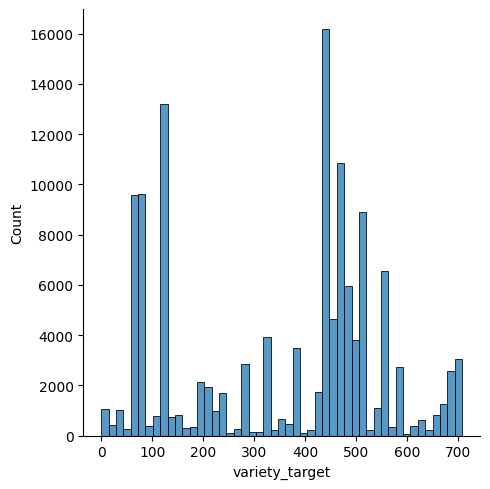

In [ ]:
#vedo visivamente se c'è equilibrio/squilibrio tra i dati target
sns.displot(data['variety_target'])

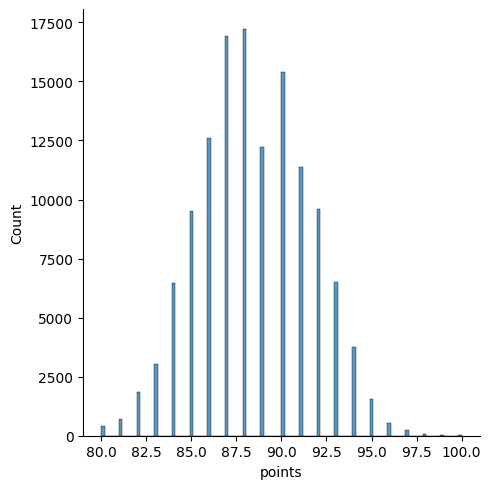

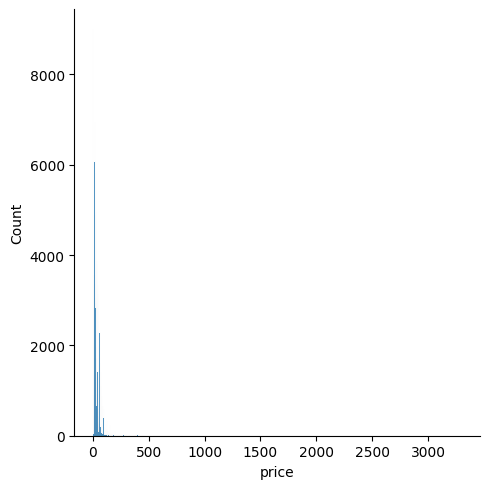

In [ ]:
#verifico se i dati sono normalmente distribuiti oppure è presente qualche asimmetria (destra/sinistra)

values = data.loc[:, ['points', 'price']] #prendo in considerazione solo le colonne con valori numerici che mi interessano
values
for column in values:
     sns.displot(x=column, data=values)

I punti sono normalmente distribuiti

I prezzi non sono normalmente distribuiti ma presentano una simmetria sinistra

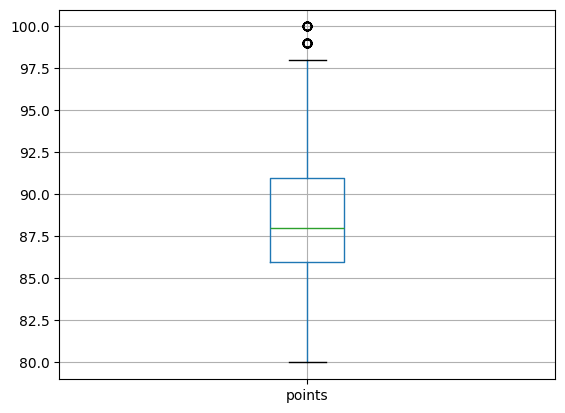

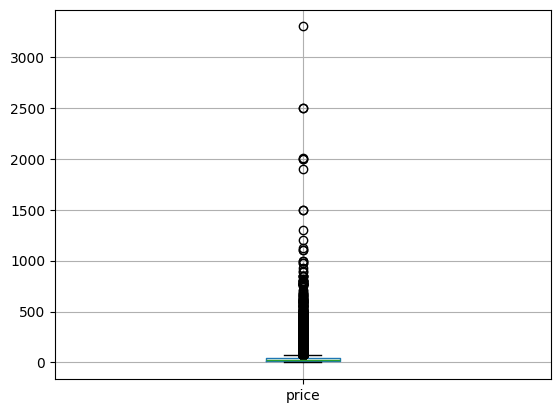

In [ ]:
#controllo dei valori outliers

for column in values:
   plt.figure()
   data.boxplot([column])

#i valori sopra il baffo superiore e sotto il baffo inferiore sono gli outlier

<Axes: >

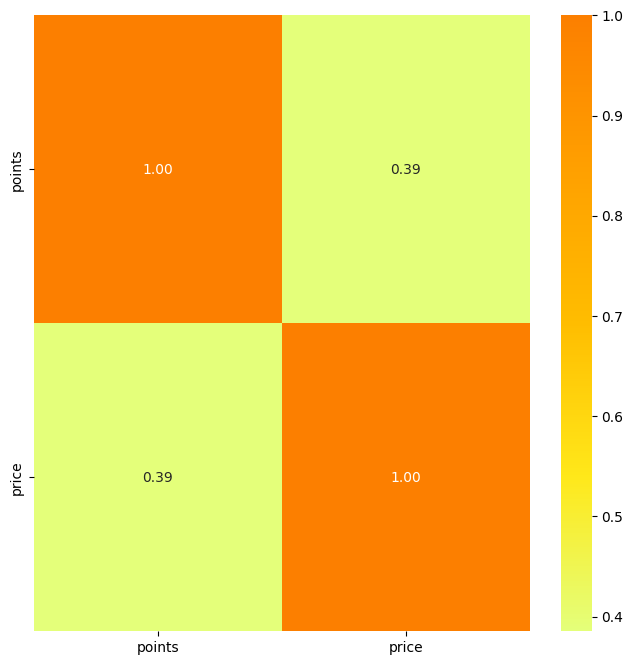

In [ ]:
#matrice di correlazione tra variabili
correlation_matrix = values.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.2f', annot=True, cmap='Wistia')

Esiste un 39% di correlazione tra punti e prezzo

#Sfoltimento dataset




In [ ]:
#elimino gli outliers sulla colonna dei punti utilizzando il modello Tukey
k = 1.5
q1 = np.percentile(data['points'], 20)
q3 = np.percentile(data['points'], 74)
iqr = q3 - q1
lower_point = q1 - k * iqr
upper_point = q3 + k * iqr

data2 = data[(data['points'] < upper_point) & (data['points'] > lower_point)]

In [ ]:
#elimino gli outliers sulla colonna dei prezzi utilizzando il modello Tukey
#faccio operazioni su data2 cioè senza gli outliers dei punteggi
h = 1.5
p1 = np.percentile(data2['price'], 16.5)
p3 = np.percentile(data2['price'], 66.5)
ipr = p3 - p1
lower_price = p1 - h * ipr
upper_price = p3 + h * ipr

data3 = data2[(data2['price'] < upper_price) & (data2['price'] > lower_price) & (data2['price'] != 0)] #non considero gli outliers e i valori nulli

In [ ]:
data3

,variety,winery,price,points,country,province,variety_target
1,Portuguese Red,Quinta dos Avidagos,15.0,87,Portugal,Douro,451
2,Pinot Gris,Rainstorm,14.0,87,US,Oregon,437
3,Riesling,St. Julian,13.0,87,US,Michigan,480
4,Pinot Noir,Sweet Cheeks,65.0,87,US,Oregon,441
5,Tempranillo-Merlot,Tandem,15.0,87,Spain,Northern Spain,591
...,...,...,...,...,...,...,...
129965,Pinot Gris,Domaine Rieflé-Landmann,28.0,90,France,Alsace,437
129966,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28.0,90,Germany,Mosel,480
129968,Gewürztraminer,Domaine Gresser,30.0,90,France,Alsace,210
129969,Pinot Gris,Domaine Marcel Deiss,32.0,90,France,Alsace,437


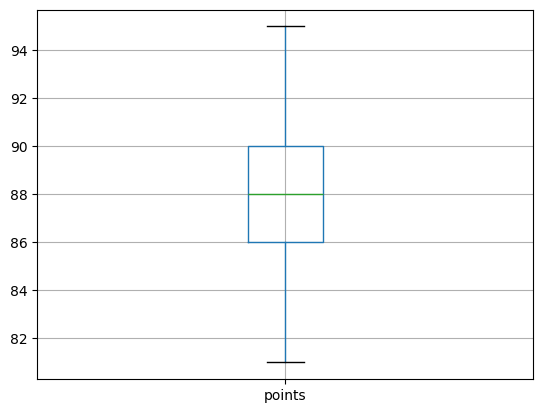

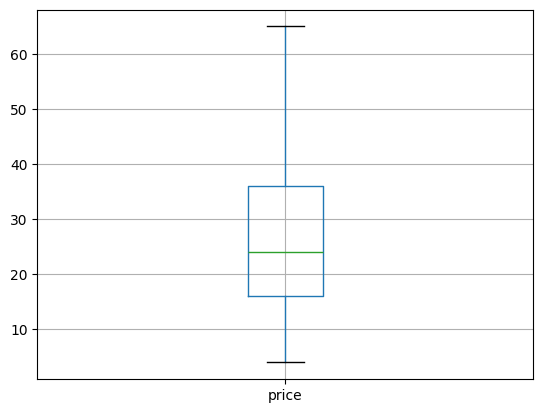

In [ ]:
#verifico graficamente l'eliminazione degli outliers
values1 = data3.loc[:, ['points', 'price']]

for column in values1:
   plt.figure()
   data3.boxplot([column])

Prendo in considerazione solo le varietà di vino con un numero di recensioni maggiori o uguali a 100

In [ ]:
#creo un dataset con il conteggio di ogni varietà
data3_count_variety = data3.groupby(['variety'])[['points']].count()
data3_count_variety1 = data3_count_variety.rename(columns={"points": "count_variety"})

# unione dataset
data3_merge = data3.set_index('variety').merge(data3_count_variety1, left_on = 'variety', right_on = 'variety', how = 'left').reset_index()

#varietà di vino con un numero di recensioni maggiori o uguali a 100
data3_merge = data3_merge[data3_merge['count_variety'] >= 100]

data3_merge

,variety,winery,price,points,country,province,variety_target,count_variety
0,Portuguese Red,Quinta dos Avidagos,15.0,87,Portugal,Douro,451,2087
1,Pinot Gris,Rainstorm,14.0,87,US,Oregon,437,1358
2,Riesling,St. Julian,13.0,87,US,Michigan,480,4626
3,Pinot Noir,Sweet Cheeks,65.0,87,US,Oregon,441,11071
6,Gewürztraminer,Trimbach,24.0,87,France,Alsace,210,930
...,...,...,...,...,...,...,...,...
109390,Pinot Gris,Domaine Rieflé-Landmann,28.0,90,France,Alsace,437,1358
109391,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28.0,90,Germany,Mosel,480,4626
109392,Gewürztraminer,Domaine Gresser,30.0,90,France,Alsace,210,930
109393,Pinot Gris,Domaine Marcel Deiss,32.0,90,France,Alsace,437,1358


#EDA su dataset sfoltito

In [ ]:
#verifico la dimensione del dataset
data3_merge.shape

(102342, 8)

In [ ]:
#verifico il tipo di dati con cui ho a che fare e quanti sono i valori non-null
data3_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102342 entries, 0 to 109394
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   variety         102342 non-null  object 
 1   winery          102342 non-null  object 
 2   price           102342 non-null  float64
 3   points          102342 non-null  int64  
 4   country         102342 non-null  object 
 5   province        102342 non-null  object 
 6   variety_target  102342 non-null  int64  
 7   count_variety   102342 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 7.0+ MB


In [ ]:
#valuto alcune misure statistiche come la media (mean) e la mediana (percentile n° 50 - 50%)
print(data3_merge.describe().round(2))

           price     points  variety_target  count_variety
count  102342.00  102342.00       102342.00      102342.00
mean       27.89      88.11          364.20        4750.80
std        14.34       2.82          193.91        3745.01
min         4.00      81.00            3.00         101.00
25%        16.00      86.00          126.00        1358.00
50%        25.00      88.00          441.00        3725.00
75%        38.00      90.00          493.00        7636.00
max        65.00      95.00          705.00       11071.00


In [ ]:
print(data3_merge['variety'].value_counts())

variety
Pinot Noir                   11071
Chardonnay                   10200
Red Blend                     7636
Cabernet Sauvignon            7262
Sauvignon Blanc               4741
                             ...  
Grillo                         109
Cabernet Sauvignon-Merlot      107
Bonarda                        103
Viura                          101
Nerello Mascalese              101
Name: count, Length: 87, dtype: int64


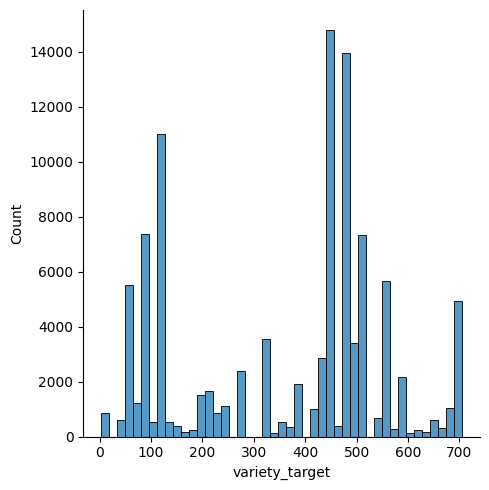

In [ ]:
sns.displot(data3_merge['variety_target'])

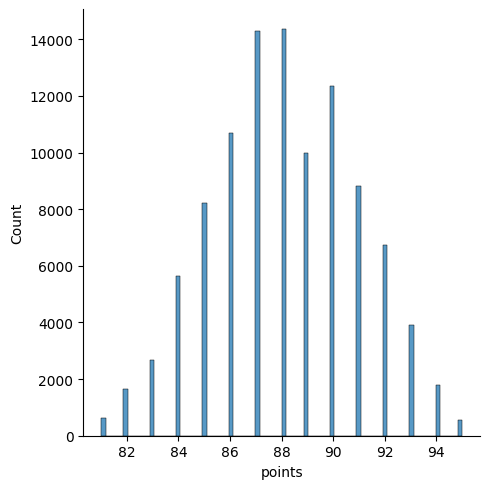

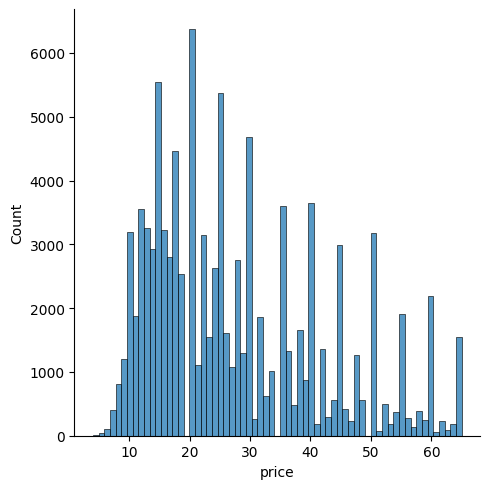

In [ ]:
#verifico se i dati sono normalmente distribuiti oppure è presente qualche asimmetria (destra/sinistra)

values2 = data3_merge.loc[:, ['points', 'price']]

for column in values2:
   sns.displot(x=column, data=values2)

<Axes: >

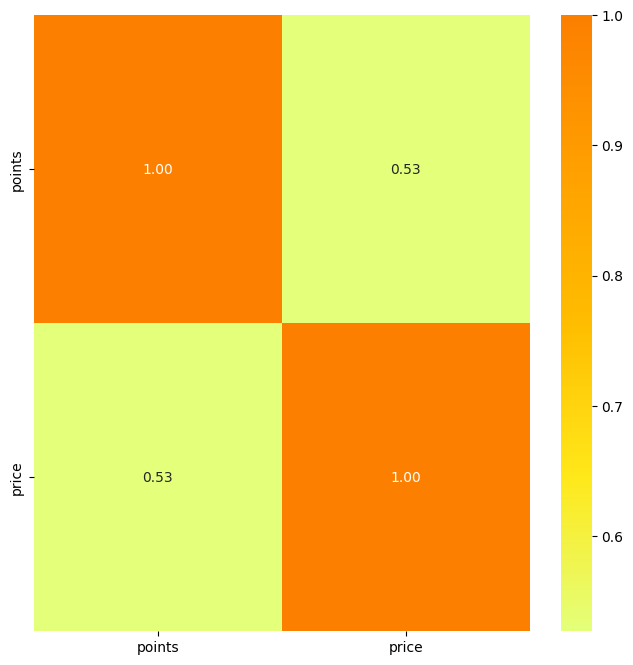

In [ ]:
#matrice di correlazione tra variabili
correlation_matrix = values2.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, fmt='.2f', annot=True, cmap='Wistia')

Esiste un 53% di correlazione tra punti e prezzo - è aumentata rispetto a dataset non sfoltito

# Analisi dataset

In [ ]:
data3_merge

Analisi su varietà con prezzo più alto e più basso e con prezzo medio più alto e più basso



In [ ]:
# varietà con prezzo più alto
max_price = data3_merge[data3_merge['price'] == data3_merge['price'].max()]
print("Varietà con prezzo più alto: \n", max_price[['variety','price']])

# varietà con prezzo più basso
min_price = data3_merge[data3_merge['price'] == data3_merge['price'].min()]
print("\nVarietà con prezzo più basso: \n", min_price[['variety','price']])

# varietà con prezzo medio più alto
max_price_mean = data3_merge.groupby(['variety'])['price'].mean().round(2).sort_values(ascending = False).reset_index() #raggruppo i dati per varietà di vino
print("\nVarietà con prezzo medio più alto: \n", max_price_mean.iloc[0])

# varietà con prezzo medio più basso
min_price_mean = data3_merge.groupby(['variety'])['price'].mean().round(2).sort_values(ascending = True).reset_index() #raggruppo i dati per varietà di vino
print("\nVarietà con prezzo medio più basso: \n", min_price_mean.iloc[0])

Analisi su varietà con punteggio più alto e più basso e con punteggio medio più alto e più basso



In [ ]:
# varietà con valutazione più alta
max_point = data3_merge[data3_merge['points'] == data3_merge['points'].max()]
print("Varietà con valutazione più alta: \n", max_point[['variety','points']])

# varietà con prezzo più basso
min_point = data3_merge[data3_merge['points'] == data3_merge['points'].min()]
print("\nVarietà con valutazione più bassa: \n", min_point[['variety','points']])

# varietà con punteggio medio più alto
max_point_mean = data3_merge.groupby(['variety'])['points'].mean().round(2).sort_values(ascending = False).reset_index() #raggruppo i dati per varietà di vino
print("\nVarietà con valutazione media più alta: \n", max_point_mean.iloc[0])

# varietà con punteggio medio più basso
min_point_mean = data3_merge.groupby(['variety'])['points'].mean().round(2).sort_values(ascending = True).reset_index() #raggruppo i dati per varietà di vino
print("\nVarietà con valutazione media più bassa: \n", min_point_mean.iloc[0])

Varietà con valutazione più alta: 
            variety  points
295       Nebbiolo      95
296     Pinot Noir      95
297         Shiraz      95
1310    Pinot Noir      95
1311         Syrah      95
...            ...     ...
106278   Red Blend      95
106280    Riesling      95
106281      Merlot      95
107397  Pinot Noir      95
108319  Pinot Noir      95

[545 rows x 2 columns]

Varietà con valutazione più bassa: 
              variety  points
294       Pinot Noir      81
3098       Red Blend      81
3100          Merlot      81
3101            Rosé      81
3102      Pinot Noir      81
...              ...     ...
105888    Chardonnay      81
105889    Chardonnay      81
107990     Carmenère      81
107991  Pinot Grigio      81
107992    Chardonnay      81

[633 rows x 2 columns]

Varietà con valutazione media più alta: 
 variety    Sangiovese Grosso
points                 90.13
Name: 0, dtype: object

Varietà con valutazione media più bassa: 
 variety    Viura
points     85.45
Name

Analisi su nazioni per prezzo medio e punteggio medio

In [ ]:
# media punti e prezzo per ogni nazione
country_mean = data3_merge[data3_merge['country'] != 0].groupby(['country']).mean(['points', 'price']).round(2)[['price','points']]

# ordina per punteggio medio
country_mean_points = country_mean.sort_values('points', ascending=False)
mean_po = data3_merge['points'].mean().round(2)
print(f'Punteggio medio ({mean_po})')
print("Nazioni per punteggio medio\n", country_mean_points['points'])

# ordina per prezzo medio
country_mean_price = country_mean.sort_values('price', ascending=False)
mean_pr = data3_merge['price'].mean().round(2)
print(f'\nPrezzo medio ({mean_pr})')
print("Nazioni per prezzo medio\n", country_mean_price['price'])

Punteggio medio (88.11)
Nazioni per punteggio medio
 country
England           91.34
India             90.22
Austria           90.02
Germany           89.57
Canada            89.25
Morocco           88.70
Luxembourg        88.40
Israel            88.35
US                88.30
Italy             88.23
New Zealand       88.21
Hungary           88.20
France            88.17
Australia         88.14
Turkey            88.11
Bulgaria          88.07
Portugal          88.06
Slovenia          88.04
Serbia            88.00
Armenia           88.00
South Africa      87.72
Czech Republic    87.40
Lebanon           87.20
Moldova           87.14
Spain             87.09
Georgia           87.06
Greece            87.03
Cyprus            87.00
Slovakia          87.00
Uruguay           86.81
Croatia           86.72
Argentina         86.56
Switzerland       86.50
Chile             86.35
Macedonia         86.29
Romania           86.25
Mexico            85.15
Brazil            84.85
Ukraine           83.83
Per

<ipython-input-32-27efe79d80b7>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (country_mean['price'][i], country_mean['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')


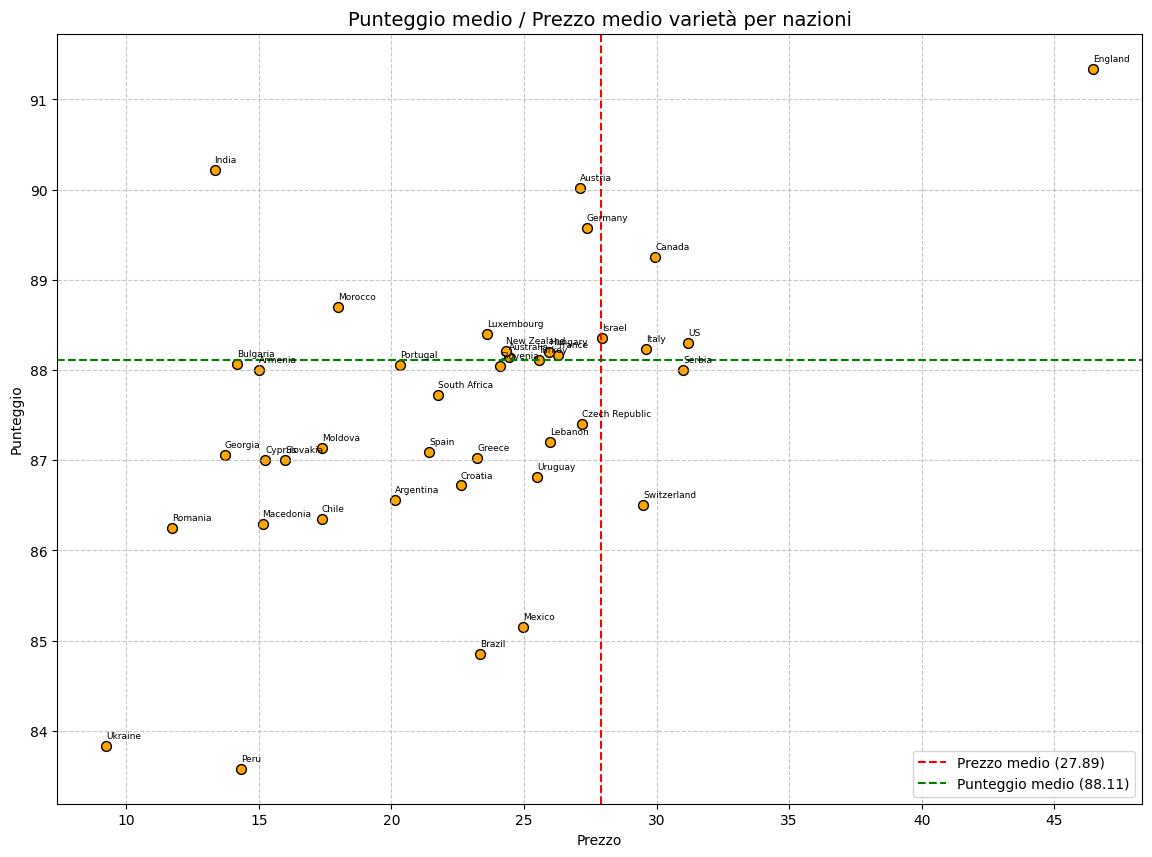

In [ ]:
# grafico a dispersione punteggio medio / prezzo medio vini per nazione
fig = plt.figure(figsize=(14, 10))
plt.scatter(country_mean['price'], country_mean['points'], s=50, c='#FFA500', marker="o", edgecolors='black')
plt.axvline(x=np.nanmean(mean_pr), color = 'r', linestyle ='--', label=f'Prezzo medio ({mean_pr:.2f})')
plt.axhline(y=np.nanmean(mean_po), color = 'g', linestyle ='--', label=f'Punteggio medio ({mean_po:.2f})')

for i, txt in enumerate(country_mean.index):
    plt.annotate(txt, (country_mean['price'][i], country_mean['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Punteggio medio / Prezzo medio varietà per nazioni", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

Analisi numero di recensioni per nazione, provincia, cantina e varietà

In [ ]:
max_rev_country = data3_merge['country'].value_counts().idxmax()
max_rev_count_country = data3_merge['country'].value_counts().max()
print(f"{max_rev_country} è la nazione con più recensioni: {max_rev_count_country}")

max_rev_province = data3_merge['province'].value_counts().idxmax()
max_rev_count_province = data3_merge['province'].value_counts().max()
print(f"\n{max_rev_province} è la provincia con più recensioni: {max_rev_count_province}")

max_rev_winery = data3_merge['winery'].value_counts().idxmax()
max_rev_count_winery = data3_merge['winery'].value_counts().max()
print(f"\n{max_rev_winery} è la cantina con più recensioni: {max_rev_count_winery}")

max_rev_variety = data3_merge['variety'].value_counts().idxmax()
max_rev_count_variety = data3_merge['variety'].value_counts().max()
print(f"\n{max_rev_variety} è la varietà con più recensioni: {max_rev_count_variety}")

US è la nazione con più recensioni: 48160

California è la provincia con più recensioni: 31487

Chateau Ste. Michelle è la cantina con più recensioni: 192

Pinot Noir è la varietà con più recensioni: 11071


Top 10 per numero recensioni per nazione, provincia, cantina e varietà

<ipython-input-34-d9aef21c3c3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_review.values, y=top_10_review.index, orient='h', palette='autumn')


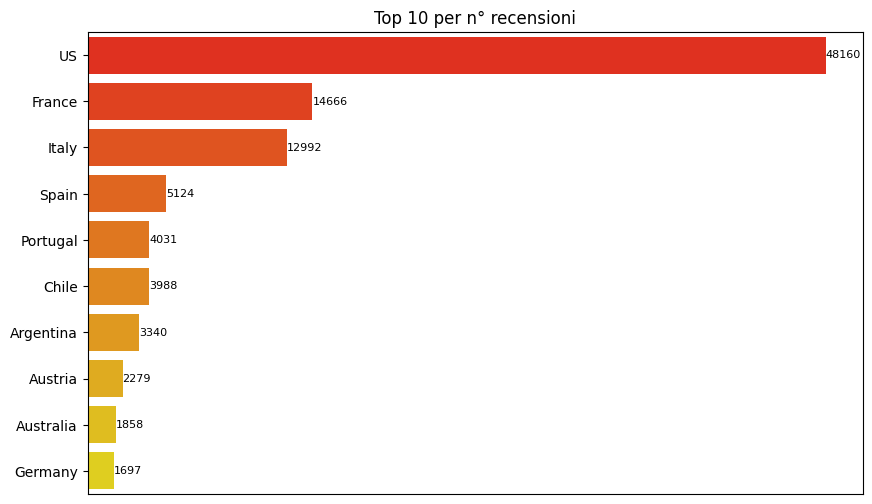

<ipython-input-34-d9aef21c3c3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_review.values, y=top_10_review.index, orient='h', palette='autumn')


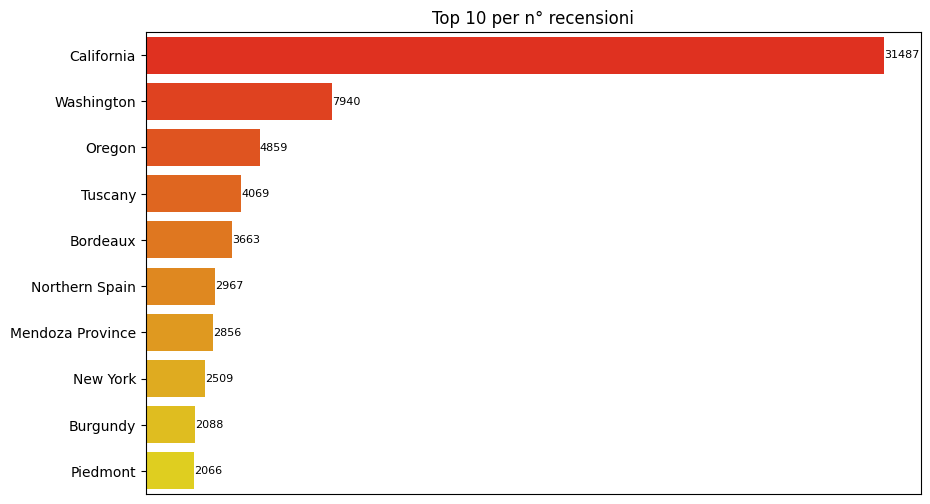

<ipython-input-34-d9aef21c3c3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_review.values, y=top_10_review.index, orient='h', palette='autumn')


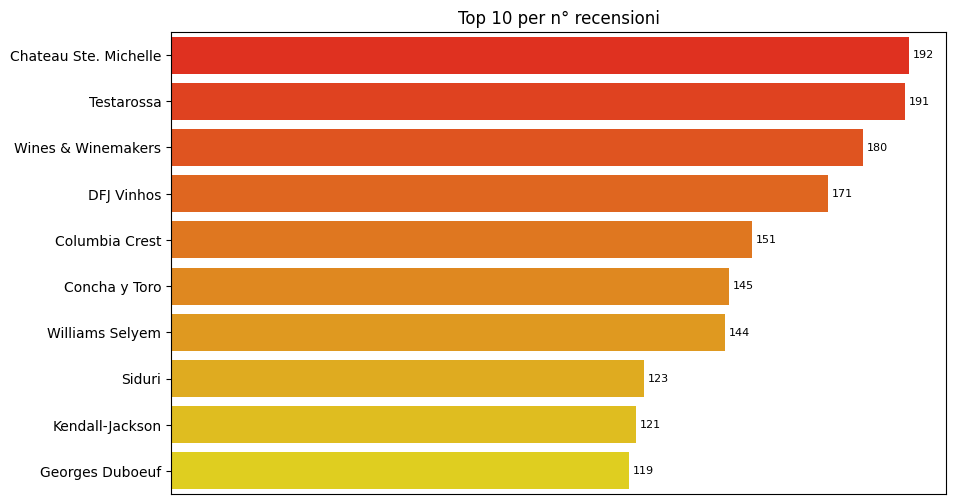

<ipython-input-34-d9aef21c3c3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_review.values, y=top_10_review.index, orient='h', palette='autumn')


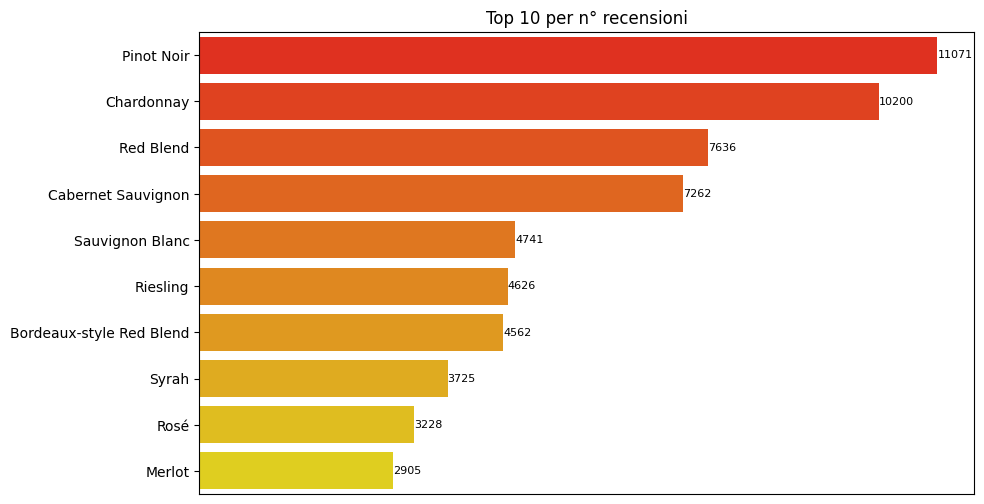

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    top_10_review = data3_merge.groupby(c)['points'].count().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=top_10_review.values, y=top_10_review.index, orient='h', palette='autumn')
    # plt.xlabel('n° recensioni')
    plt.ylabel('')
    plt.title(f'Top 10 per n° recensioni')
    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width + 1 , g.get_y() + g.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=8)

    plt.show()

Flop 10 per numero recensioni per nazione, provincia, cantina e varietà

<ipython-input-35-0568baeb6006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_review.values, y=flop_10_review.index, orient='h', palette='GnBu')


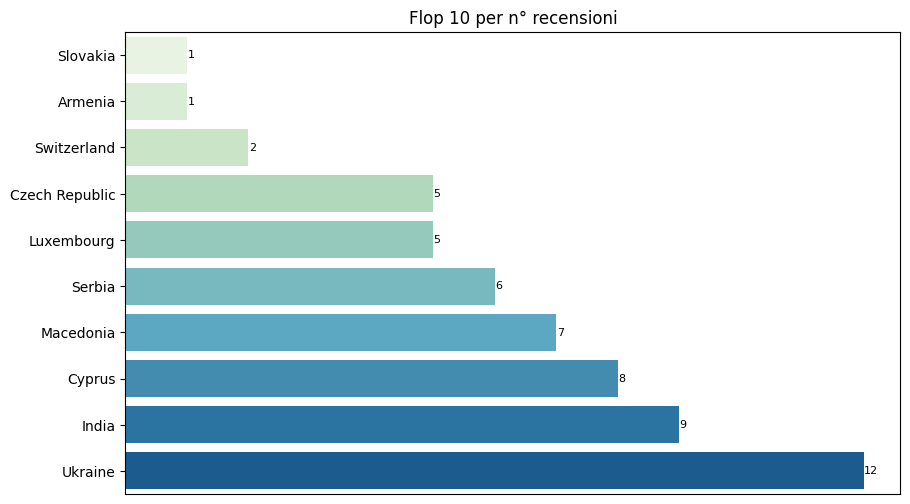

<ipython-input-35-0568baeb6006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_review.values, y=flop_10_review.index, orient='h', palette='GnBu')


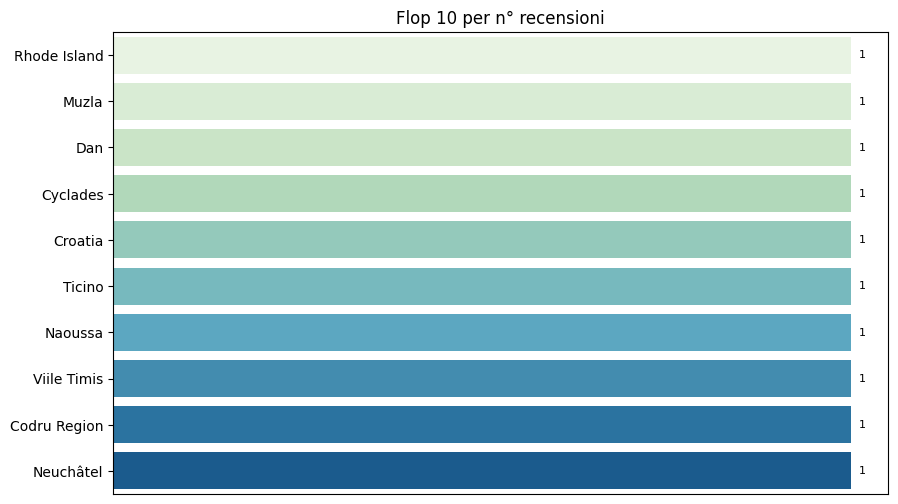

<ipython-input-35-0568baeb6006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_review.values, y=flop_10_review.index, orient='h', palette='GnBu')


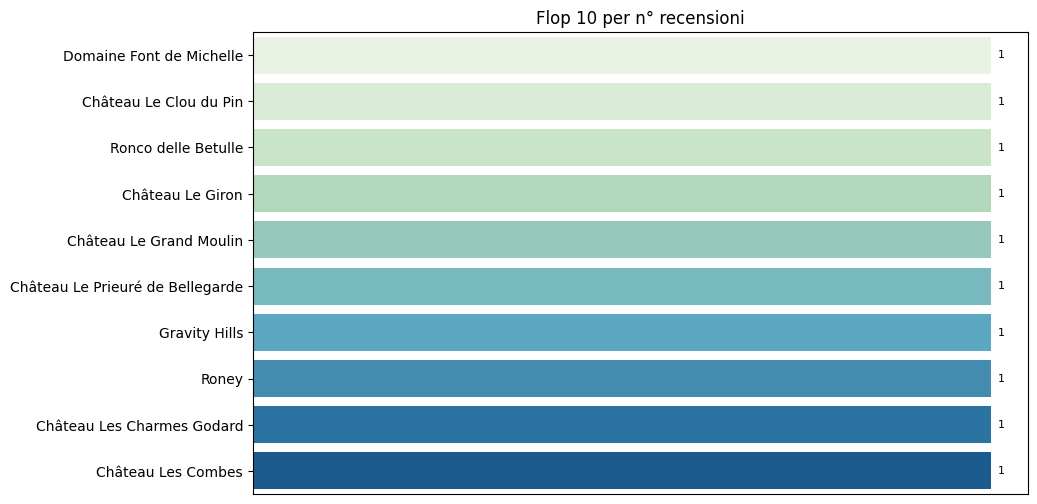

<ipython-input-35-0568baeb6006>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_review.values, y=flop_10_review.index, orient='h', palette='GnBu')


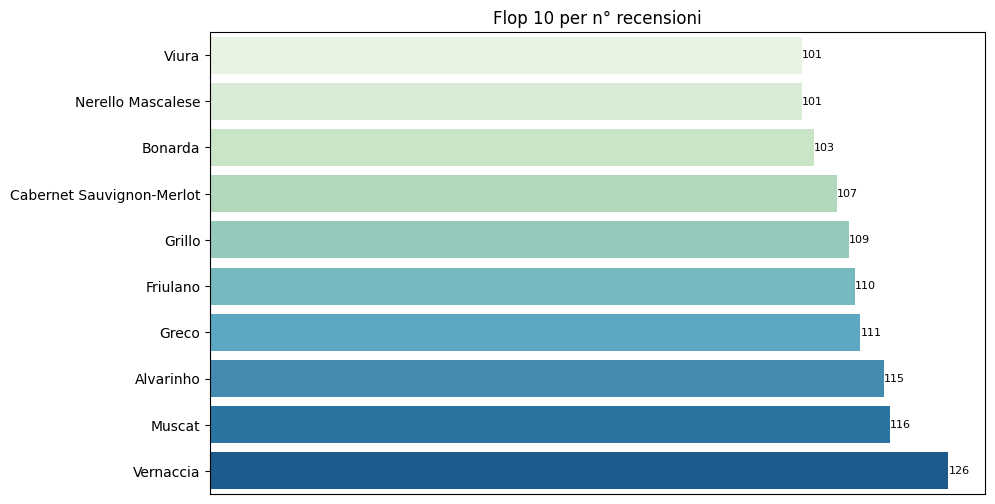

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    flop_10_review = data3_merge.groupby(c)['points'].count().sort_values(ascending=True).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=flop_10_review.values, y=flop_10_review.index, orient='h', palette='GnBu')
    # plt.xlabel('n° recensioni')
    plt.ylabel('')
    plt.title(f'Flop 10 per n° recensioni')
    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width + 0.01, g.get_y() + g.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=8)

    plt.show()

Top 10 per punteggio medio per nazione, provincia, cantina e varietà

<ipython-input-36-edfa5ca9f7dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_points_mean.values, y=top_10_points_mean.index, orient='h', palette='autumn')


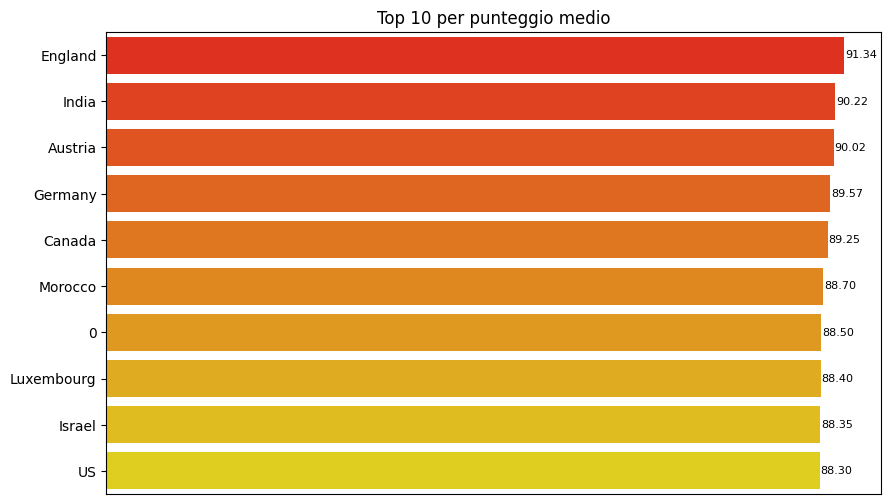

<ipython-input-36-edfa5ca9f7dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_points_mean.values, y=top_10_points_mean.index, orient='h', palette='autumn')


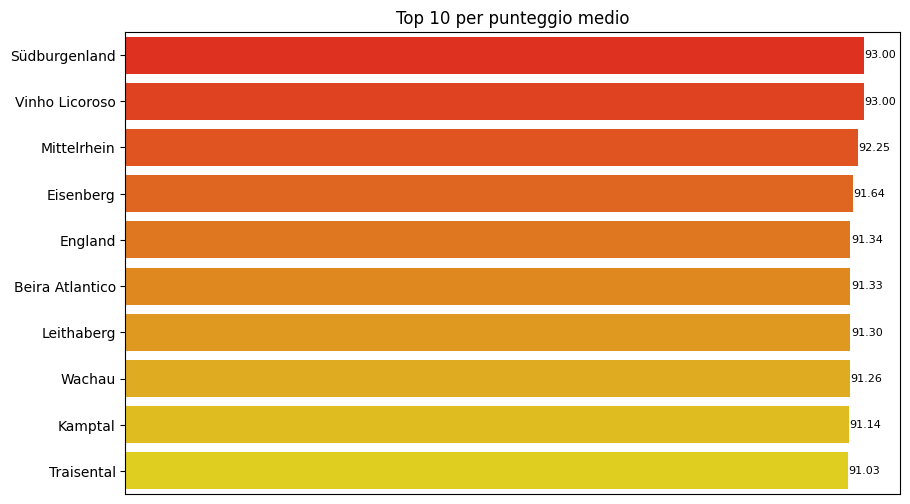

<ipython-input-36-edfa5ca9f7dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_points_mean.values, y=top_10_points_mean.index, orient='h', palette='autumn')


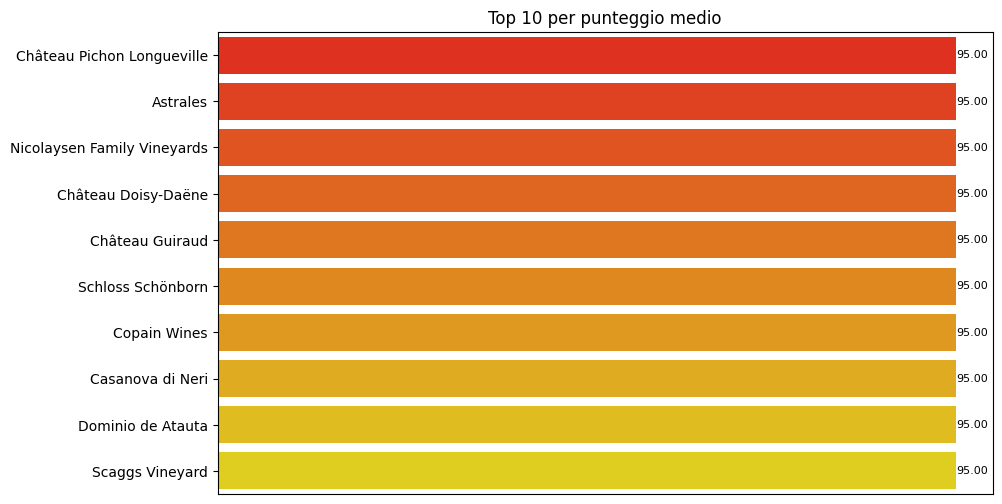

<ipython-input-36-edfa5ca9f7dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_points_mean.values, y=top_10_points_mean.index, orient='h', palette='autumn')


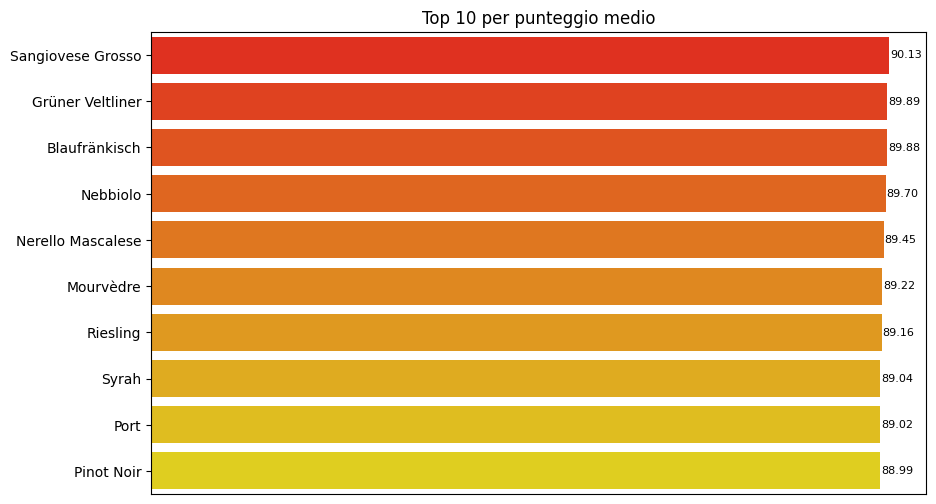

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    top_10_points_mean = data3_merge.groupby(c)['points'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=top_10_points_mean.values, y=top_10_points_mean.index, orient='h', palette='autumn')
    # plt.xlabel('punteggio medio')
    plt.ylabel('')
    plt.title(f'Top 10 per punteggio medio')

    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width + 0.1, g.get_y() + g.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

    plt.show()

Flop 10 per punteggio medio per nazione, provincia, cantina e varietà

<ipython-input-37-f35730def06c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_points_mean.values, y=flop_10_points_mean.index, orient='h', palette='GnBu')


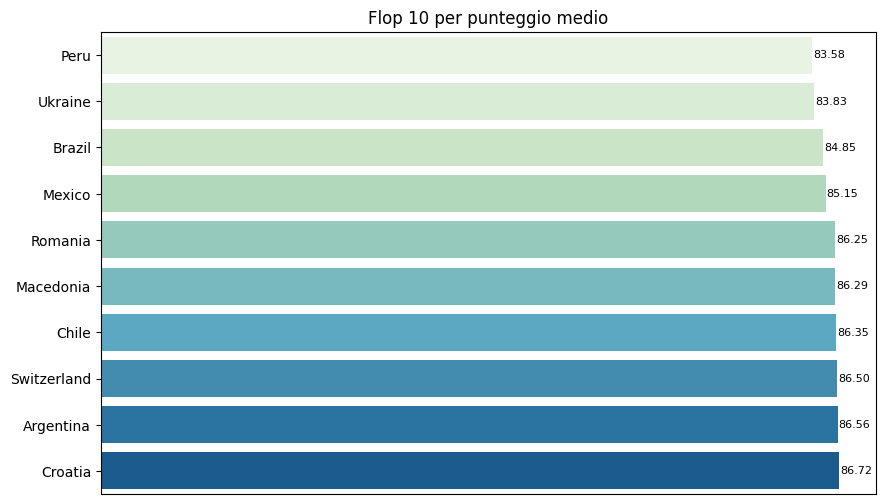

<ipython-input-37-f35730def06c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_points_mean.values, y=flop_10_points_mean.index, orient='h', palette='GnBu')


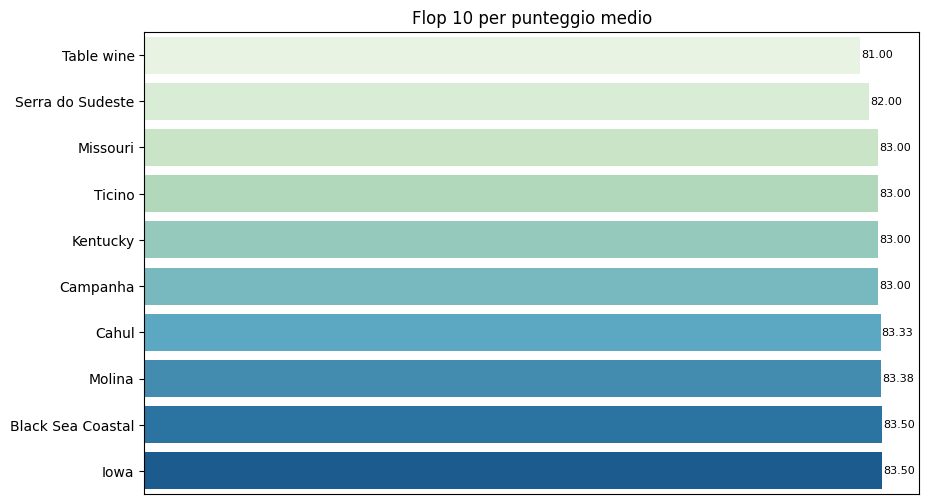

<ipython-input-37-f35730def06c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_points_mean.values, y=flop_10_points_mean.index, orient='h', palette='GnBu')


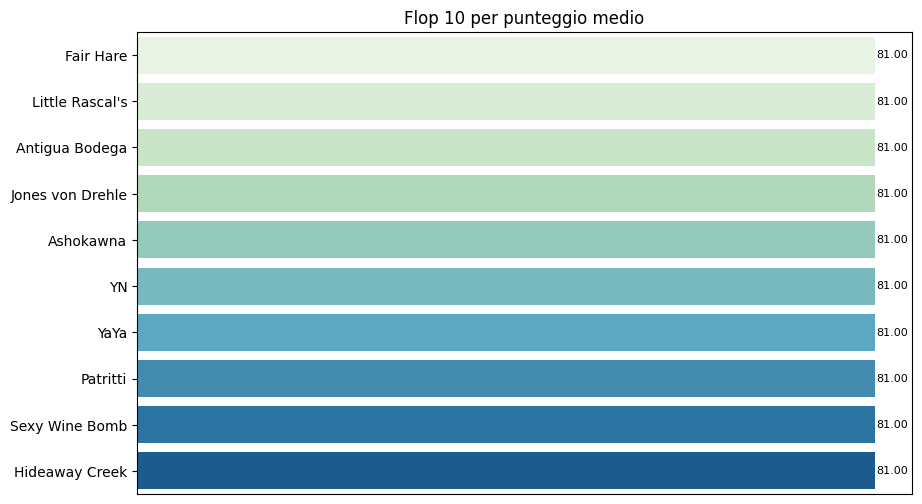

<ipython-input-37-f35730def06c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_points_mean.values, y=flop_10_points_mean.index, orient='h', palette='GnBu')


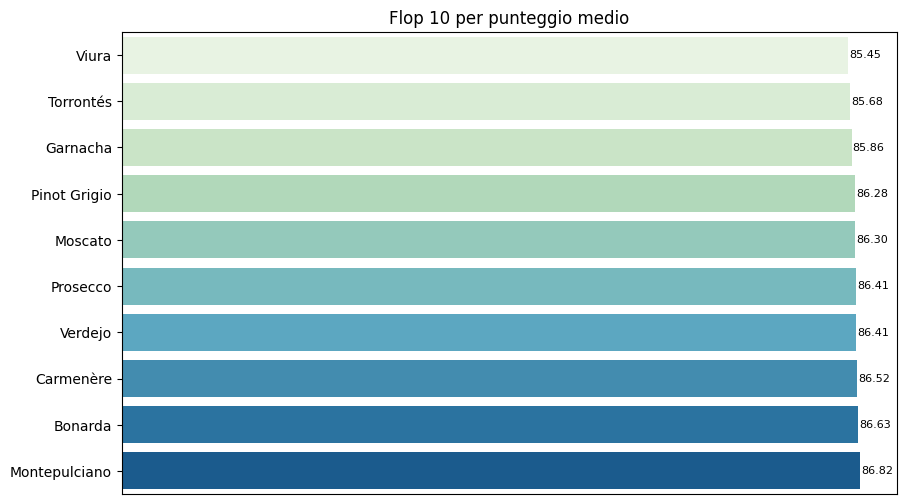

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    flop_10_points_mean = data3_merge.groupby(c)['points'].mean().sort_values(ascending=True).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=flop_10_points_mean.values, y=flop_10_points_mean.index, orient='h', palette='GnBu')
    # plt.xlabel('punteggio medio')
    plt.ylabel('')
    plt.title(f'Flop 10 per punteggio medio')

    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width + 0.1, g.get_y() + g.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

    plt.show()

Top 10 per prezzo medio per nazione, provincia, cantina e varietà

<ipython-input-38-f721f1e673d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_price_mean.values, y=top_10_price_mean.index, orient='h', palette='autumn')


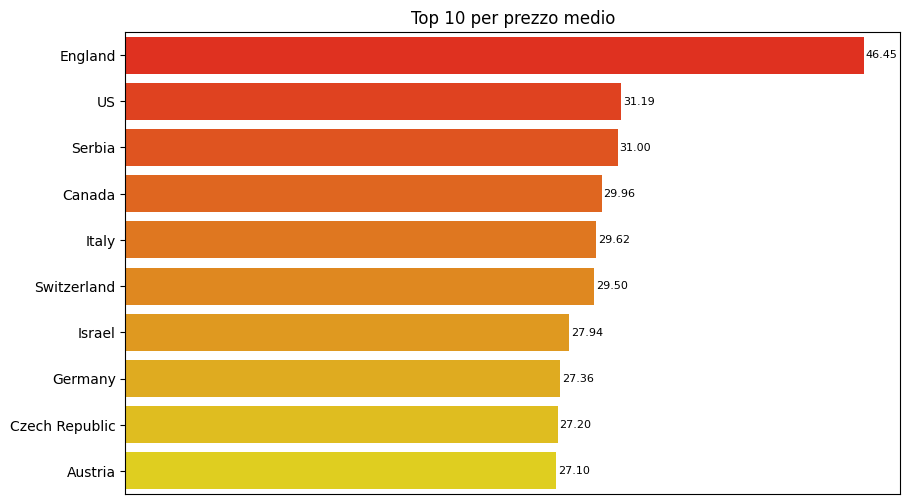

<ipython-input-38-f721f1e673d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_price_mean.values, y=top_10_price_mean.index, orient='h', palette='autumn')


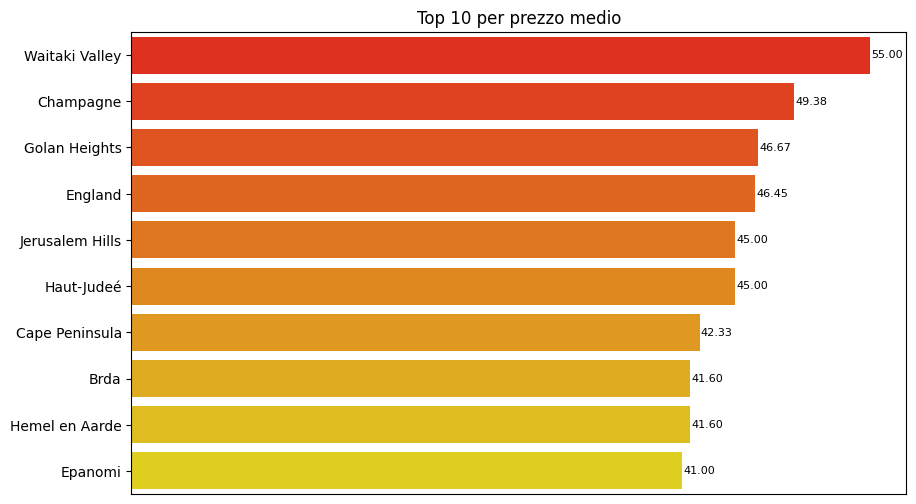

<ipython-input-38-f721f1e673d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_price_mean.values, y=top_10_price_mean.index, orient='h', palette='autumn')


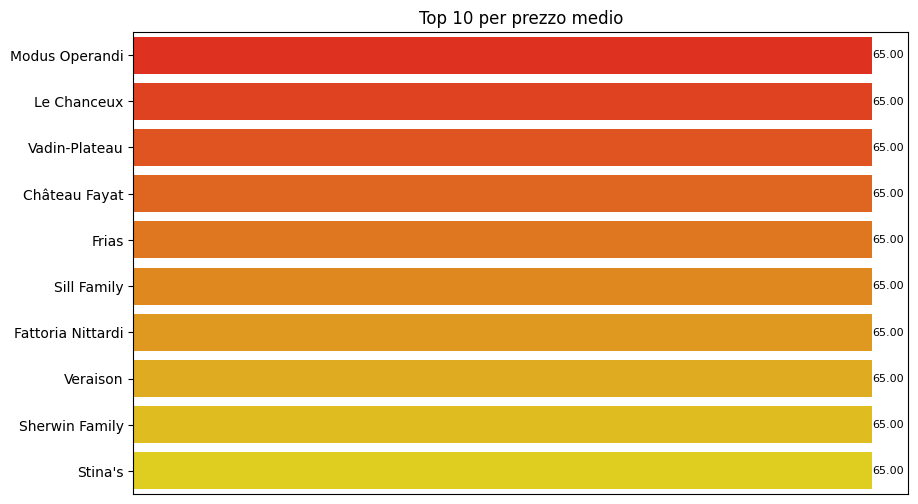

<ipython-input-38-f721f1e673d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=top_10_price_mean.values, y=top_10_price_mean.index, orient='h', palette='autumn')


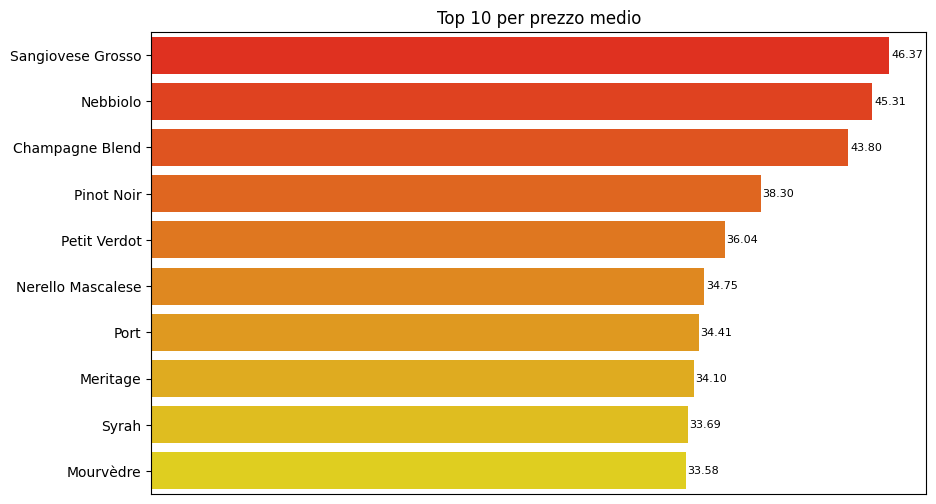

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    top_10_price_mean = data3_merge.groupby(c)['price'].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=top_10_price_mean.values, y=top_10_price_mean.index, orient='h', palette='autumn')
    # plt.xlabel('prezzo medio')
    plt.ylabel('')
    plt.title(f'Top 10 per prezzo medio')

    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width + 0.1, g.get_y() + g.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

    plt.show()

Flop 10 per prezzo medio per nazione, provincia, cantina e varietà

<ipython-input-39-5e4023d60718>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_price_mean.values, y=flop_10_price_mean.index, orient='h', palette='GnBu')


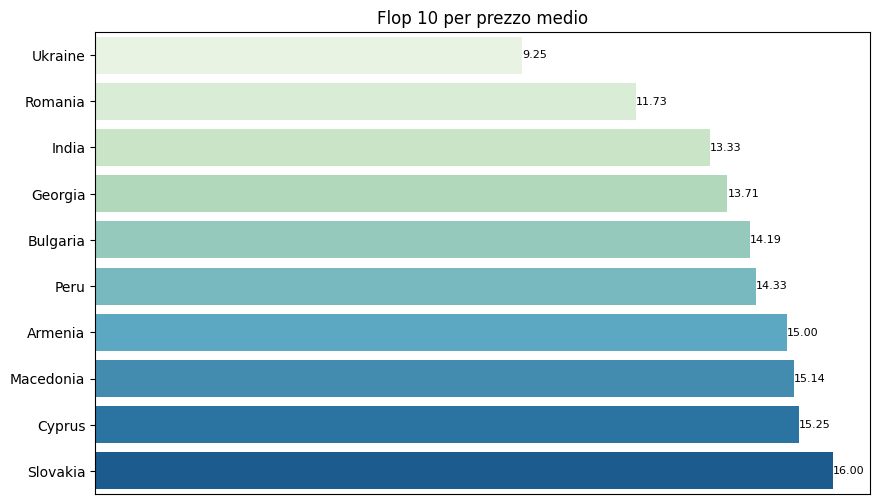

<ipython-input-39-5e4023d60718>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_price_mean.values, y=flop_10_price_mean.index, orient='h', palette='GnBu')


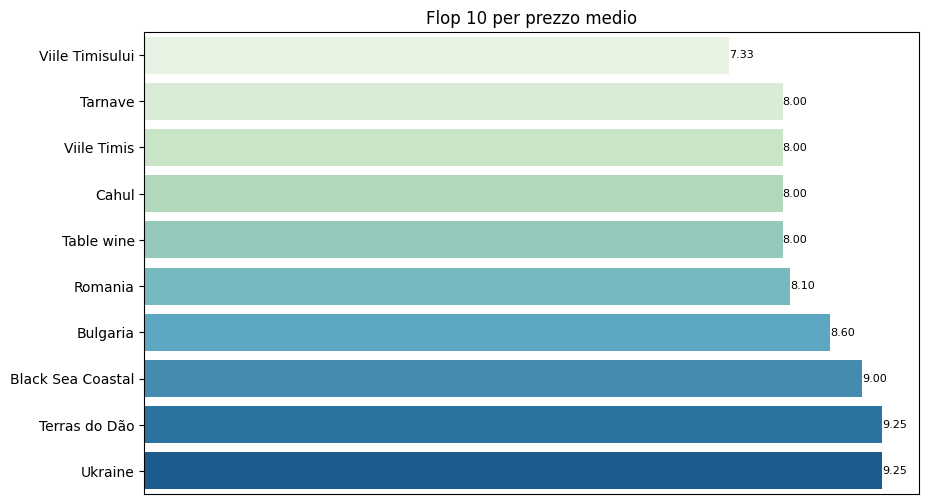

<ipython-input-39-5e4023d60718>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_price_mean.values, y=flop_10_price_mean.index, orient='h', palette='GnBu')


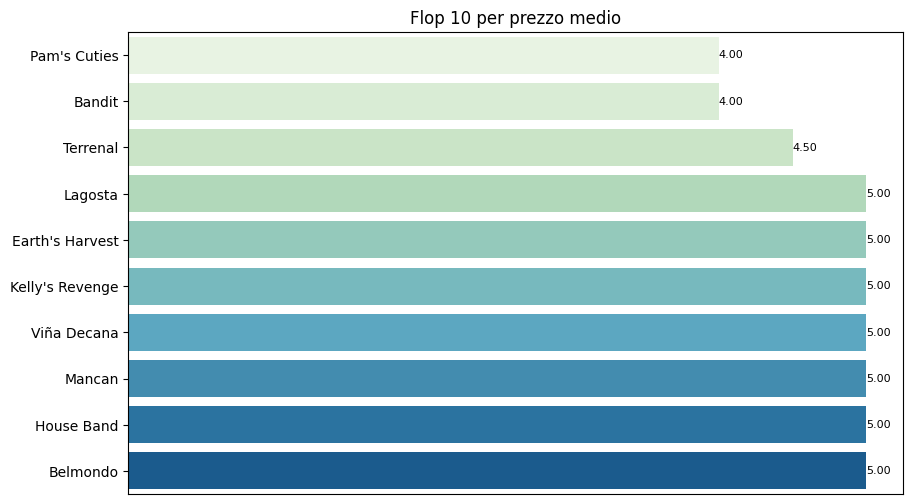

<ipython-input-39-5e4023d60718>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graphic = sns.barplot(x=flop_10_price_mean.values, y=flop_10_price_mean.index, orient='h', palette='GnBu')


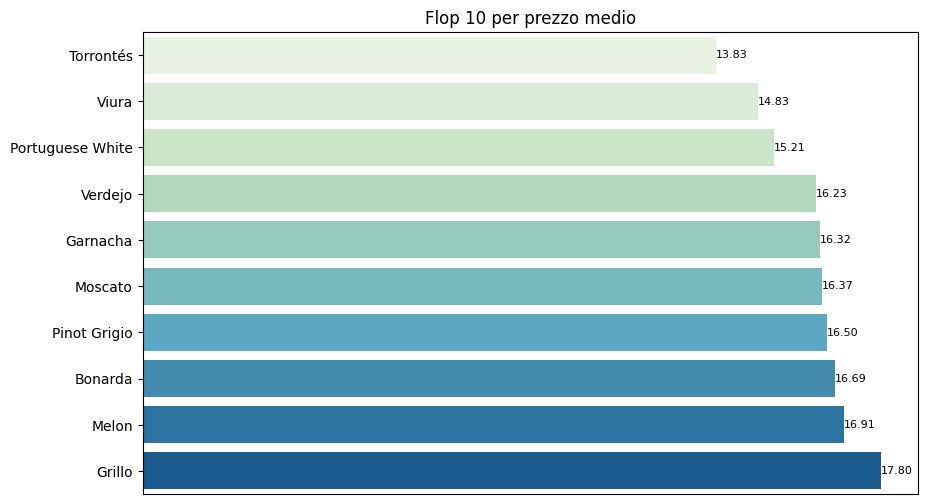

In [ ]:
column = ['country', 'province', 'winery', 'variety']

for c in column:
    flop_10_price_mean = data3_merge.groupby(c)['price'].mean().sort_values(ascending=True).head(10)

    plt.figure(figsize=(10, 6))
    graphic = sns.barplot(x=flop_10_price_mean.values, y=flop_10_price_mean.index, orient='h', palette='GnBu')
    # plt.xlabel('prezzo medio')
    plt.ylabel('')
    plt.title(f'Flop 10 per prezzo medio')

    plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    for g in graphic.patches:
        width = g.get_width()
        plt.text(width, g.get_y() + g.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

    plt.show()

# Marketplace

Analisi su varietà per prezzo medio e punteggio medio

In [ ]:
# per ogni varietà ottengo prezzo e punteggio medi
data3_merge_variety = data3_merge.groupby('variety').mean(['price', 'points']).round(2)[['price','points']]

# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(data3_merge_variety['price'], data3_merge_variety['points'], s=50, c='#FFA500', marker="o", edgecolors='black')
plt.axvline(x=np.nanmean(mean_pr), color = 'r', linestyle ='--', label=f'Prezzo medio ({mean_pr:.2f})')
plt.axhline(y=np.nanmean(mean_po), color = 'g', linestyle ='--', label=f'Punteggio medio ({mean_po:.2f})')

for i, txt in enumerate(data3_merge_variety.index):
    plt.annotate(txt, (data3_merge_variety['price'][i], data3_merge_variety['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Punteggio medio / Prezzo medio per varietà", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(data3_merge_variety)

Divisione varietà per fascia di prezzo

In [ ]:
# individuo il prezzo medio minimo e massimo per identificare fasce di prezzo
min = data3_merge_variety['price'].min()
max = data3_merge_variety['price'].max()

# definisco le fasce
#fascia 1: bassa
group1 = data3_merge_variety[data3_merge_variety['price'] <= (min+((max-min)/3))].sort_values('points', ascending=False)
print(f'Fascia prezzo basso\n', group1)

#fascia 2: media
group2 = data3_merge_variety[(data3_merge_variety['price'] >= (min+((max-min)/3))) & (data3_merge_variety['price'] <= (max-((max-min)/3)))].sort_values('points', ascending=False)
print(f'\nFascia prezzo medio\n', group2)

#fascia 3: alta
group3 = data3_merge_variety[data3_merge_variety['price'] >= (max-((max-min)/3))].sort_values('points', ascending=False)
print(f'\nFascia prezzo alto\n', group3)

In [ ]:
# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(group1['price'], group1['points'], s=80, c='green', marker="o", edgecolors='black', label='basso')
plt.scatter(group2['price'], group2['points'], s=80, c='blue', marker="o", edgecolors='black', label='medio')
plt.scatter(group3['price'], group3['points'], s=80, c='purple', marker="o", edgecolors='black', label='alto')

plt.axvline(x=np.nanmean((min+((max-min)/3))), color = 'r', linestyle ='--')
plt.axvline(x=np.nanmean((max-((max-min)/3))), color = 'r', linestyle ='--')
# plt.axhline(y=np.nanmean(mean_po), color = 'g', linestyle ='--')

for i, txt in enumerate(data3_merge_variety.index):
    plt.annotate(txt, (data3_merge_variety['price'][i], data3_merge_variety['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Punteggio medio / Prezzo medio per varietà", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', title ='Fascia prezzo')
plt.xticks([min+((max-min)/3), max-((max-min)/3)])
plt.tight_layout()
plt.show()

Scelta marketplace - primi 10 vini per punteggio medio per ogni fascia di prezzo

In [ ]:
group1_top10 = group1.head(10)
group2_top10 = group2.head(10)
group3_top10 = group3.head(10)
marketplace = pd.concat([group1_top10, group2_top10, group3_top10]).sort_values('price', ascending=True)

In [ ]:
# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(data3_merge_variety['price'], data3_merge_variety['points'], s=50, c='#FFA500', marker="o", edgecolors='black', alpha=0.3)

plt.scatter(group1_top10['price'], group1_top10['points'], s=100, c='green', marker="o", edgecolors='black', label='basso')
plt.scatter(group2_top10['price'], group2_top10['points'], s=100, c='blue', marker="o", edgecolors='black', label='medio')
plt.scatter(group3_top10['price'], group3_top10['points'], s=100, c='purple', marker="o", edgecolors='black', label='alto')

for i, txt in enumerate(marketplace.index):
    plt.annotate(txt, (marketplace['price'][i], marketplace['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=7, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Marketplace: top 10 varietà per fascia di prezzo", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', title ='Fascia prezzo')
plt.tight_layout()
plt.show()

print(marketplace)

# Marketplace - ITALIA


Analisi su varietà per prezzo medio e punteggio medio

In [ ]:
# punteggio medio e prezzo medio per Italia
mean_price_italy = data3_merge[data3_merge['country'] == 'Italy']['price'].mean()
mean_points_italy = data3_merge[data3_merge['country'] == 'Italy']['points'].mean()

# per ogni varietà ottengo prezzo e valutazione medi
data3_merge_italy = data3_merge[data3_merge['country'] == 'Italy'].groupby('variety').mean(['price','points']).round(2)[['price','points']]

# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(data3_merge_italy['price'], data3_merge_italy['points'], s=50, c='#FFA500', marker="o", edgecolors='black')
plt.axvline(x=np.nanmean(mean_price_italy), color = 'r', linestyle ='--', label=f'Prezzo medio ({mean_price_italy:.2f})')
plt.axhline(y=np.nanmean(mean_points_italy), color = 'g', linestyle ='--', label=f'Punteggio medio ({mean_points_italy:.2f})')

for i, txt in enumerate(data3_merge_italy.index):
    plt.annotate(txt, (data3_merge_italy['price'][i], data3_merge_italy['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Punteggio medio / Prezzo medio per varietà - Italia", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(data3_merge_italy)

Divisione varietà per fascia di prezzo

In [ ]:
# individuo il prezzo medio minimo e massimo per identificare fasce prezzo
min_italy = data3_merge_italy['price'].min()
max_italy = data3_merge_italy['price'].max()

# definisco le fasce
#fascia 1: bassa
group1_italy = data3_merge_italy[data3_merge_italy['price'] <= (min_italy+((max_italy-min_italy)/3))].sort_values('points', ascending=False)
print(f'Fascia prezzo basso - Italia\n', group1_italy)

#fascia 2: media
group2_italy = data3_merge_italy[(data3_merge_italy['price'] >= (min_italy+((max_italy-min_italy)/3))) & (data3_merge_italy['price'] <= (max_italy-((max_italy-min_italy)/3)))].sort_values('points', ascending=False)
print(f'\nFascia prezzo medio - Italia\n', group2_italy)

#fascia 3: alta
group3_italy = data3_merge_italy[data3_merge_italy['price'] >= (max_italy-((max_italy-min_italy)/3))].sort_values('points', ascending=False)
print(f'\nFascia prezzo alto - Italia\n', group3_italy)


In [ ]:
# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(group1_italy['price'], group1_italy['points'], s=80, c='green', marker="o", edgecolors='black', label='basso')
plt.scatter(group2_italy['price'], group2_italy['points'], s=80, c='blue', marker="o", edgecolors='black', label='medio')
plt.scatter(group3_italy['price'], group3_italy['points'], s=80, c='purple', marker="o", edgecolors='black', label='alto')

plt.axvline(x=np.nanmean((min_italy+((max_italy-min_italy)/3))), color = 'r', linestyle ='--')
plt.axvline(x=np.nanmean((max_italy-((max_italy-min_italy)/3))), color = 'r', linestyle ='--')
# plt.axhline(y=np.nanmean(mean_points_italy), color = 'g', linestyle ='--')

for i, txt in enumerate(data3_merge_italy.index):
   plt.annotate(txt, (data3_merge_italy['price'][i], data3_merge_italy['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=6.5, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Punteggio medio / Prezzo medio per varietà - Italia", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', title ='Fascia prezzo')
plt.xticks([min_italy+((max_italy-min_italy)/3), max_italy-((max_italy-min_italy)/3)])
plt.tight_layout()
plt.show()

Scelta marketplace - primi 5 vini per punteggio medio per ogni fascia di prezzo

In [ ]:
group1_italy_top = group1_italy.head(5)
group2_italy_top = group2_italy.head(5)
group3_italy_top = group3_italy.head(5)
marketplace_italy = pd.concat([group1_italy_top, group2_italy_top, group3_italy_top]).sort_values('price', ascending=True)

In [ ]:
# grafico a dispersione punteggio medio / prezzo medio vini per varietà
fig = plt.figure(figsize=(22, 10))
plt.scatter(data3_merge_italy['price'], data3_merge_italy['points'], s=50, c='#FFA500', marker="o", edgecolors='black', alpha=0.3)

plt.scatter(group1_italy_top['price'], group1_italy_top['points'], s=80, c='green', marker="o", edgecolors='black', label='basso')
plt.scatter(group2_italy_top['price'], group2_italy_top['points'], s=80, c='blue', marker="o", edgecolors='black', label='medio')
plt.scatter(group3_italy_top['price'], group3_italy_top['points'], s=80, c='purple', marker="o", edgecolors='black', label='alto')

for i, txt in enumerate(marketplace_italy.index):
    plt.annotate(txt, (marketplace_italy['price'][i], marketplace_italy['points'][i]), xytext=(0, 4), textcoords='offset points', fontsize=7, ha='left', va='bottom')

plt.xlabel("Prezzo")
plt.ylabel("Punteggio")
plt.title("Marketplace Italia: top 5 varietà per fascia di prezzo", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', title ='Fascia prezzo')
plt.tight_layout()
plt.show()

print(marketplace_italy)